In this notebook, we explore the number of case and sanction amount overtime.

In [49]:
#import libary and configure
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Confgure
# Path to data
PATH_TO_DATA = "../data/processed/faa_enforcement_final_cleaned.csv"
# Size of plots
plt.rcParams['figure.figsize'] = (10, 5)

In [50]:
df = pd.read_csv(PATH_TO_DATA, parse_dates=["DATE KNOWN", "CLOSED DATE"])
df.head()


,CASE NUMBER,NAME,ENTITY TYPE,DATE KNOWN,ACTION,SANCTION AMOUNT,SANCTION,CASE TYPE,CLOSED DATE
0,2008GL070135,CRUCIAL AIR SUPPORT LLC,APPROVD REPAIR STA,2008-09-22,ORD ASSESS CIVIL PENALTY,1000.0,DOLLARS,MAINTENANCE,2010-01-04
1,2007WP190107,PRIMARIS AIRLINES INC,A/C or COMM OPER,2007-07-10,ORD ASSESS CIVIL PENALTY,NaN,SANCTION WAIVED,RECORDS/RPTS,2010-01-04
2,2006WP700166,MESA AIRLINES INC,A/C or COMM OPER,2006-06-19,ORD ASSESS CP HMT,55000.0,DOLLARS,HAZ MAT,2010-01-05
3,2007WP700017,MESA AIRLINES INC,A/C or COMM OPER,2006-10-18,ORD ASSESS CP HMT,60000.0,DOLLARS,HAZ MAT,2010-01-05
4,2008SO950034,PACIFIC WINGS L L C,A/C or COMM OPER,2007-10-31,ORD ASSESS CIVIL PENALTY,10000.0,DOLLARS,DRUG TESTING,2010-01-07


<Axes: title={'center': 'Industry Cases Over Time'}, xlabel='DATE KNOWN', ylabel='Number of Cases'>

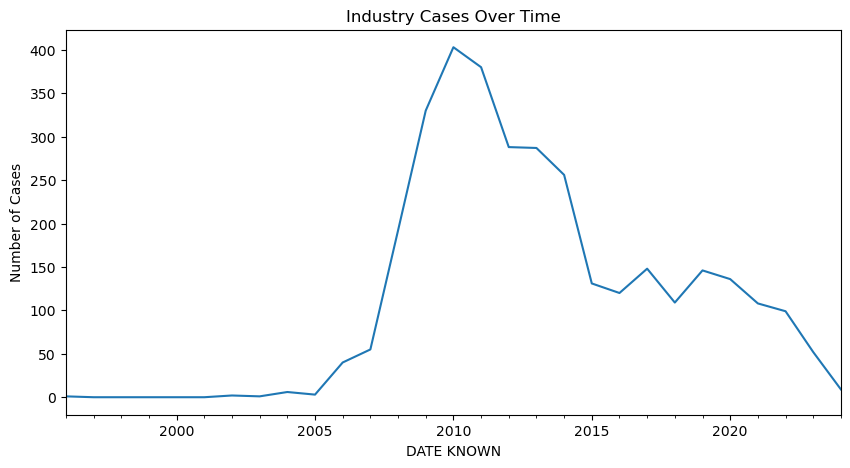

In [ ]:

#Case over time
cases_ts = (df.set_index('DATE KNOWN')
              .assign(_=1)['_']
              .resample('Y').sum())

cases_ts.plot(title='Industry Cases Over Time', ylabel='Number of Cases')

<Axes: title={'center': 'Total Sanctions Over Time (Millions)'}, xlabel='DATE KNOWN', ylabel='Sanctions (M USD)'>

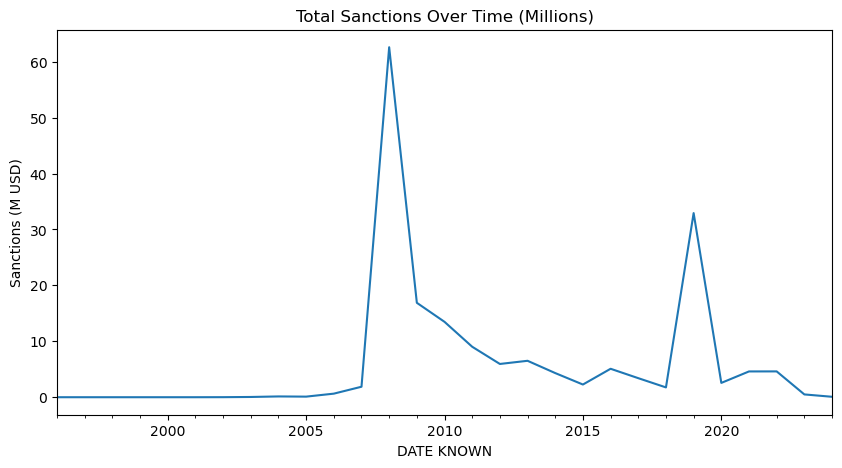

In [52]:
df['SANCTION AMOUNT'] = pd.to_numeric(df['SANCTION AMOUNT']
                                      .astype(str).str.replace(',', ''),
                                      errors='coerce')
sanctions_ts = (df.set_index('DATE KNOWN')['SANCTION AMOUNT']
                  .resample('Y').sum()) / 1_000_000

sanctions_ts.plot(title='Total Sanctions Over Time (Millions)',
                  ylabel='Sanctions (M USD)')


Revocation cases: 242


<Axes: title={'center': 'Revocation Cases Over Time'}, xlabel='DATE KNOWN', ylabel='Number of Revocations'>

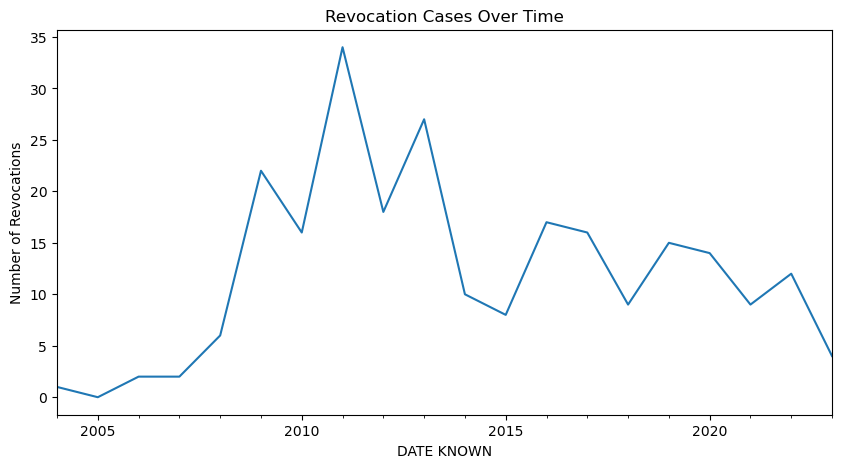

In [53]:
df_revoke = df[df['SANCTION'] == 'REVOCATION']
print("Revocation cases:", len(df_revoke))
df_revoke.head()

revoke_cases = (df_revoke.set_index('DATE KNOWN')
                              .assign(_=1)['_']
                              .resample('Y').sum())

revoke_cases.plot(title='Revocation Cases Over Time',
                  ylabel='Number of Revocations')


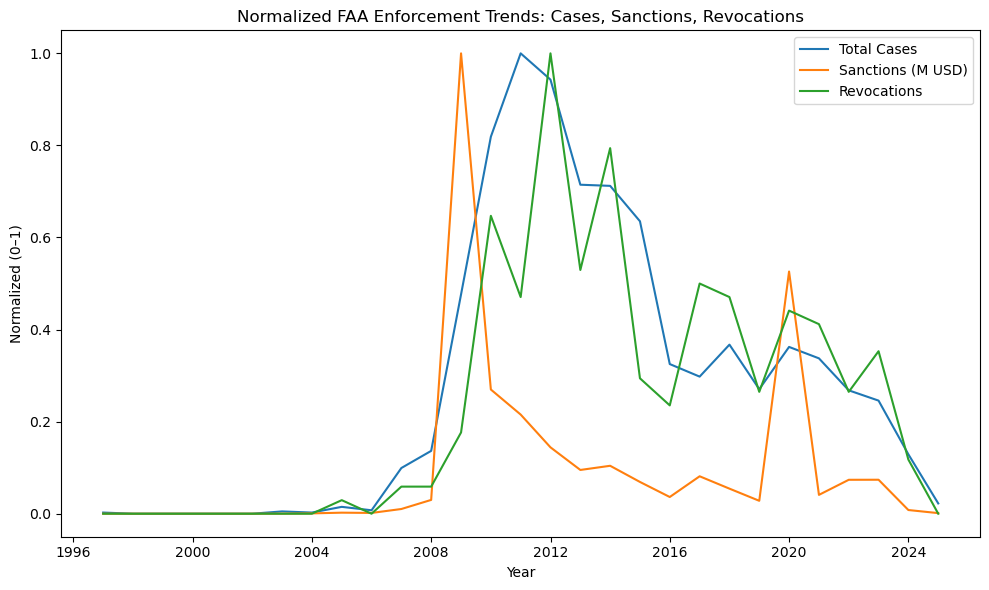

In [54]:
# --- 1. Total cases per year ---
all_cases = (df.set_index('DATE KNOWN')
               .assign(_=1)['_']
               .resample('Y').sum())

# --- 2. Sanctions amount per year (millions) ---
df['SANCTION AMOUNT'] = pd.to_numeric(df['SANCTION AMOUNT'].astype(str).str.replace(',', ''), errors='coerce')
sanctions = (df.set_index('DATE KNOWN')['SANCTION AMOUNT']
               .resample('Y').sum()) / 1_000_000

# --- 3. Revocations per year ---
df_revoke = df[df['SANCTION'] == 'REVOCATION']
revoke_cases = (df_revoke.set_index('DATE KNOWN')
                              .assign(_=1)['_']
                              .resample('Y').sum())

# --- 4. Combine into one dataframe ---
df_combo = pd.DataFrame({
    'Total Cases': all_cases,
    'Sanctions (M USD)': sanctions,
    'Revocations': revoke_cases
}).fillna(0)

# --- 5. Normalize each series (0–1) ---
df_norm = df_combo.divide(df_combo.max())

# --- 6. Plot trends ---
plt.figure(figsize=(10,6))
for col in df_norm.columns:
    plt.plot(df_norm.index, df_norm[col], label=col)

plt.title('Normalized FAA Enforcement Trends: Cases, Sanctions, Revocations')
plt.xlabel('Year')
plt.ylabel('Normalized (0–1)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Count total cases per company
cases_by_company = df['NAME'].value_counts().head(10)

print("Top 10 companies by number of cases:")
print(cases_by_company)


Top companies with revocation cases:
NAME
GEG AVIATION INC                   2
AIRCAP MANAGEMENT COMPANY INC      2
SKYWARD AIR SERVICE LLC            2
BLUE SKY CHARTER LLC               2
AIROPTIONS AVIATION LLC            2
TRAX AIR CHARTER LLC               2
JETSTREAM AVIATION GROUP LLC       2
AEGIS MANAGEMENT COMPANY I INC     2
RYAN INTERNATIONAL AIRLINES INC    2
BLACKJACK HELICOPTERS INC          2
Name: count, dtype: int64
